# Inference with pre-trained models

In this notebook, we show how to perform object detection with pre-trained models using MMDetection.

This step is also called *inference*.


## Installation

Run in command line

```
pip install openmim, mmengine
mim install mmcv-full mmdet
```

copy & paste above codes to command line IF packages are NOT installed

## Config and Checkpoint File

**Config file**

All items required to define a training *experiment*, including

- model
- dataset and data augmentation pipeline
- training algorithms and learning rate policies
- runtime config of the program

**Checkpoint file**

A pytorch `pth` file, containing the `state_dict` of a model as well as some meta information.
A checkpoint file is usually trained from a config file, using the toolbox.

We can navigate to [home page](https://github.com/open-mmlab/mmdetection) to select a model
and download corresponding config & checkpoint file using `mim`.

```
mim download mmdet --config retinanet_r18_fpn_1x_coco --dest . 
```

In [1]:
!mim download mmdet --config retinanet_r18_fpn_1x_coco --dest . 

processing retinanet_r18_fpn_1x_coco...
retinanet_r18_fpn_1x_coco_20220407_171055-614fd399.pth exists in /home/cine/Documents/sjtu-openmmlab-tutorial-main
Successfully dumped retinanet_r18_fpn_1x_coco.py to /home/cine/Documents/sjtu-openmmlab-tutorial-main


## Inference using high-level API

In [2]:
from mmdet.apis import init_detector, inference_detector
from mmdet.registry import VISUALIZERS
from mmdet.utils import register_all_modules

# Register all modules in mmdet into the registries
register_all_modules()

# Specify the path to model config and checkpoint file
config_file = 'configs/faster_rcnn/faster-rcnn_r50-fpn_1x_coco.py'
checkpoint_file = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# Build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta
# Ttest a single image and show the results

img = 'test.jpg'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)

/home/cine/miniconda3/envs/mmlab2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/cine/miniconda3/envs/mmlab2/lib/python3.8/site-packages/mmengine/model/utils.py:138: UserWarning: Cannot import torch.fx, `merge_dict` is a simple function to merge multiple dicts
  warnings.warn('Cannot import torch.fx, `merge_dict` is a simple function '


02/08 15:56:26 - mmengine - WARNING - The "model" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
02/08 15:56:26 - mmengine - WARNING - The "task util" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
Loads checkpoint by local backend from path: retinanet_r18_fpn_1x_coco_20220407_171055-614fd399.pth
02/08 15:56:28 - mmengine - WARNING - The "visualizer" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.


/home/cine/miniconda3/envs/mmlab2/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:163: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


In [6]:
from mmdet.apis import init_detector, inference_detector

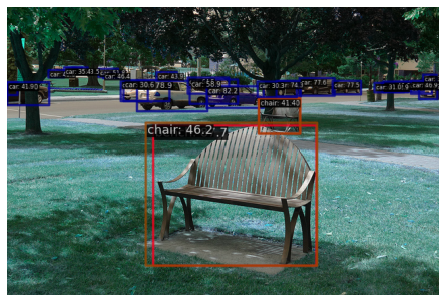

In [8]:
model = init_detector('retinanet_r18_fpn_1x_coco.py', 
                      'retinanet_r18_fpn_1x_coco_20220407_171055-614fd399.pth', 
                      device='cuda:0')

In [4]:
result = inference_detector(model, 'bench.jpg')

C:\Users\wangruohui\Miniconda3\envs\mm\lib\site-packages\mmdet\datasets\utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


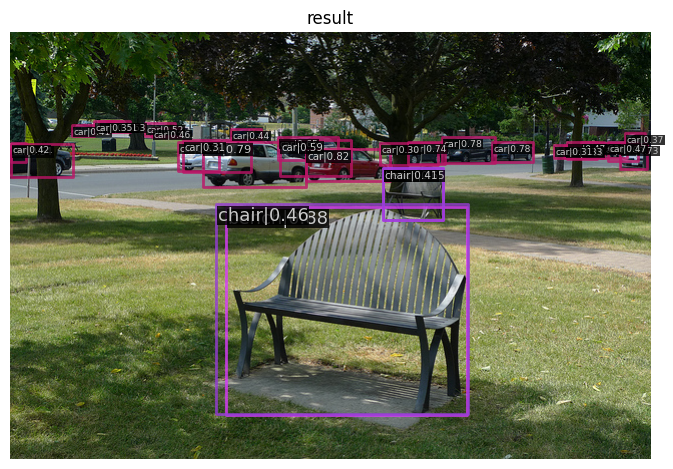

In [5]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, 'bench.jpg', result)